# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "metric"

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

sub_record = 1
set_record = 1


print("Beginning Data Retrieval ")
print("==============================")

for city in cities:
    
    query_url = url + "appid=" + api_key + "&q=" + city +"&units=" + unit
    response = requests.get(query_url).json()
    
    
    try :
        
        city_record = response["name"]
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {sub_record} of set {set_record} | {city_record}")  
        sub_record = sub_record + 1
        
        if sub_record%50 == 1: 
            set_record = set_record + 1
            sub_record = 1

    
    except:
        print("City not found. Skipping....")

print("=================================")
print("Data Retireval Complete")
print("=================================")

Beginning Data Retrieval 
Processing Record 1 of set 1 | Tiksi
Processing Record 2 of set 1 | Sao Joao da Barra
Processing Record 3 of set 1 | Havre
Processing Record 4 of set 1 | Barrow
Processing Record 5 of set 1 | Chokurdakh
Processing Record 6 of set 1 | Kuliyapitiya
Processing Record 7 of set 1 | Yellowknife
Processing Record 8 of set 1 | Borba
City not found. Skipping....
Processing Record 9 of set 1 | Faanui
City not found. Skipping....
Processing Record 10 of set 1 | Ancud
Processing Record 11 of set 1 | Mar del Plata
Processing Record 12 of set 1 | Bluff
Processing Record 13 of set 1 | Port Macquarie
Processing Record 14 of set 1 | Chuy
Processing Record 15 of set 1 | Puerto Ayora
Processing Record 16 of set 1 | Samarai
Processing Record 17 of set 1 | Auki
Processing Record 18 of set 1 | Fortuna
Processing Record 19 of set 1 | Marsala
Processing Record 20 of set 1 | Hamilton
Processing Record 21 of set 1 | Mount Isa
Processing Record 22 of set 1 | Ostrovnoy
Processing Record 

Processing Record 31 of set 4 | Sandane
City not found. Skipping....
Processing Record 32 of set 4 | Ovre Ardal
Processing Record 33 of set 4 | Phangnga
Processing Record 34 of set 4 | Roald
Processing Record 35 of set 4 | Provideniya
Processing Record 36 of set 4 | Wonthaggi
Processing Record 37 of set 4 | Kharp
Processing Record 38 of set 4 | Waddan
Processing Record 39 of set 4 | Kinango
Processing Record 40 of set 4 | Sile
Processing Record 41 of set 4 | Inhambane
Processing Record 42 of set 4 | Palu
Processing Record 43 of set 4 | Pahalgam
Processing Record 44 of set 4 | Atasu
Processing Record 45 of set 4 | Nebolchi
Processing Record 46 of set 4 | Praia da Vitoria
Processing Record 47 of set 4 | Baruun-Urt
Processing Record 48 of set 4 | Filadelfia
Processing Record 49 of set 4 | Lasa
Processing Record 50 of set 4 | Saint George
Processing Record 1 of set 5 | Vao
City not found. Skipping....
Processing Record 2 of set 5 | Takoradi
Processing Record 3 of set 5 | Tartagal
Processin

Processing Record 18 of set 8 | Jiaocheng
Processing Record 19 of set 8 | Itarema
Processing Record 20 of set 8 | Bemidji
Processing Record 21 of set 8 | Verkhniy Uslon
Processing Record 22 of set 8 | Ochamchira
City not found. Skipping....
Processing Record 23 of set 8 | Streator
Processing Record 24 of set 8 | Gawler
Processing Record 25 of set 8 | Tokmak
Processing Record 26 of set 8 | Ariquemes
Processing Record 27 of set 8 | Vostok
Processing Record 28 of set 8 | Gulabpura
Processing Record 29 of set 8 | Broken Hill
City not found. Skipping....
Processing Record 30 of set 8 | Ucluelet
Processing Record 31 of set 8 | Takaka
Processing Record 32 of set 8 | Yulara
Processing Record 33 of set 8 | Dolores
Processing Record 34 of set 8 | Lodja
Processing Record 35 of set 8 | Luanda
Processing Record 36 of set 8 | Kualakapuas
Processing Record 37 of set 8 | Lazaro Cardenas
Processing Record 38 of set 8 | Goderich
Processing Record 39 of set 8 | Snezhnogorsk
Processing Record 40 of set 8 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
weather_dict = {
    "City" : city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Wind Speed" : wind_speed
}

In [27]:
weather_df = pd.DataFrame(weather_dict)
weather_df.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

In [28]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tiksi,64,RU,1551817225,59,71.64,128.87,-17.04,4.56
1,Sao Joao da Barra,40,BR,1551812400,62,-21.64,-41.05,30.00,8.20
2,Havre,1,US,1551817027,71,48.55,-109.68,-9.44,6.70
3,Barrow,8,AR,1551817302,21,-38.31,-60.23,27.06,5.56
4,Chokurdakh,24,RU,1551817128,0,70.62,147.90,-35.24,1.36


In [29]:
weather_df.to_csv("weather_df.csv",index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

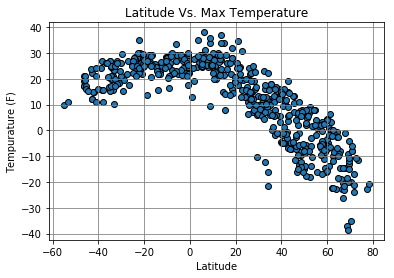

In [30]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],marker= 'o',edgecolors="black")
plt.title("Latitude Vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Tempurature (F)")
plt.grid(color = "gray")
plt.show()

#### Latitude vs. Humidity Plot

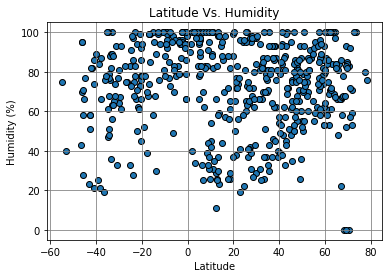

In [36]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],marker= 'o',edgecolors="black")
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color = "gray")
plt.savefig("Lat_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

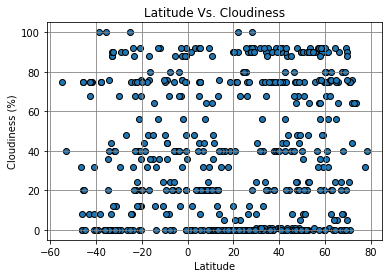

In [37]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],marker= 'o',edgecolors="black")
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color = "gray")
plt.savefig("Lat_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

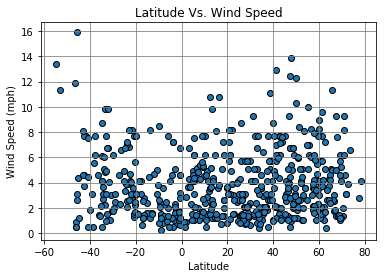

In [38]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],marker= 'o',edgecolors="black")
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(color = "gray")
plt.savefig("Lat_WindSpeed.png")
plt.show()